In [1]:
import pickle
import numpy as np
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt

In [2]:
with open('X.pkl', 'rb') as f:
    X = pickle.load(f)
with open('y.pkl', 'rb') as f:
    y = pickle.load(f)  

In [47]:
X = X.reshape(-1, 1 ,64)

In [48]:
print(X.shape, y.shape)

(1847, 1, 64) (1847,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
input_ = layers.Input((1,64))
x = layers.LSTM(256)(input_)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256)(x)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128)(x)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64)(x)
x = tfa.layers.GELU()(x)
output = layers.Dense(1)(x)

In [37]:
opt = tf.keras.optimizers.Adam(1e-4)
model = Model(input_, output)

In [38]:
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


2022-09-12 16:17:49.600798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/93 [..............................] - ETA: 1:42 - loss: 12.7691

2022-09-12 16:17:49.870477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-12 16:17:49.966091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 10.8282

2022-09-12 16:17:51.203145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-12 16:17:51.292729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 3s 15ms/step - loss: 10.8282 - val_loss: 10.8614
Epoch 2/100
93/93 [==============================] - 1s 11ms/step - loss: 10.7511 - val_loss: 10.7483
Epoch 3/100
93/93 [==============================] - 1s 12ms/step - loss: 10.5309 - val_loss: 10.2662
Epoch 4/100
93/93 [==============================] - 1s 12ms/step - loss: 9.1418 - val_loss: 6.6869
Epoch 5/100
93/93 [==============================] - 1s 11ms/step - loss: 2.1640 - val_loss: 0.9109
Epoch 6/100
93/93 [==============================] - 1s 11ms/step - loss: 0.7806 - val_loss: 0.6326
Epoch 7/100
93/93 [==============================] - 1s 11ms/step - loss: 0.7786 - val_loss: 0.6067
Epoch 8/100
93/93 [==============================] - 1s 12ms/step - loss: 0.6328 - val_loss: 0.6103
Epoch 9/100
93/93 [==============================] - 1s 12ms/step - loss: 0.6074 - val_loss: 0.6146
Epoch 10/100
93/93 [==============================] - 1s 12ms/step - loss: 0.6407 - val_loss: 1.0407
Epoch

93/93 [==============================] - 1s 11ms/step - loss: 0.3997 - val_loss: 0.4553
Epoch 83/100
93/93 [==============================] - 1s 11ms/step - loss: 0.3850 - val_loss: 0.4122
Epoch 84/100
93/93 [==============================] - 1s 12ms/step - loss: 0.3966 - val_loss: 0.4403
Epoch 85/100
93/93 [==============================] - 1s 11ms/step - loss: 0.4214 - val_loss: 0.6318
Epoch 86/100
93/93 [==============================] - 1s 11ms/step - loss: 0.3812 - val_loss: 0.4156
Epoch 87/100
93/93 [==============================] - 1s 12ms/step - loss: 0.4016 - val_loss: 0.4066
Epoch 88/100
93/93 [==============================] - 1s 11ms/step - loss: 0.4394 - val_loss: 0.4902
Epoch 89/100
93/93 [==============================] - 1s 11ms/step - loss: 0.4088 - val_loss: 0.4194
Epoch 90/100
93/93 [==============================] - 1s 11ms/step - loss: 0.4206 - val_loss: 0.4203
Epoch 91/100
93/93 [==============================] - 1s 11ms/step - loss: 0.4500 - val_loss: 0.4636
Epo

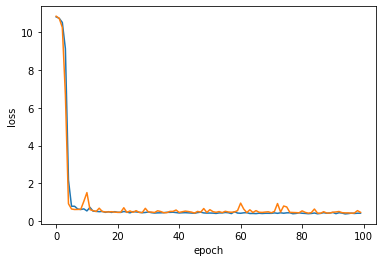

In [39]:
plt.plot(np.array([history.history['loss'], history.history['val_loss']]).T)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [43]:
model.save('reg.h5')